In [1]:
import xarray as xr
import numpy as np
import glob
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from xarray import DataArray
import pandas as pd
# from PyEMD import EEMD
import pylab as plt

In [4]:
assi  = np.load("/work/uo1075/u241321/data/eemd_slheat_Norwegian.npy")/100000000. # (5,50) mode(input, c1-c4), time

In [5]:
assi

array([[ 5.48805969e-01, -1.89125294e+00,  3.21721673e+00,
        -3.09925018e+00,  3.53175910e+00, -1.60966772e+00,
        -9.33789612e-02,  8.26474417e-01, -1.48743374e+00,
         2.64716636e+00, -3.73401272e-01, -2.66365113e+00,
         9.34049552e-01, -5.65925816e-01,  3.34038813e+00,
        -2.21365529e+00,  2.18037743e+00,  2.17438599e-01,
        -2.01710581e+00,  7.64500763e-01,  4.15426757e-01,
         6.48425742e-02, -7.01868413e-01, -1.19816780e+00,
         1.05296914e+00, -1.69591662e+00,  7.23420240e-01,
        -1.27443362e+00, -7.33161251e-01,  1.03052844e+00,
         1.83168968e-01, -1.31357331e+00, -1.58052495e-01,
        -8.05979395e-01, -3.48595401e-01,  1.71467514e+00,
         3.73068514e-01, -1.05094038e+00, -2.27264141e+00,
        -5.54390415e-02, -1.86537865e+00,  1.97550189e+00,
        -1.09520241e-02,  1.14782302e+00,  8.04573789e-01,
         1.00525427e+00,  2.33028992e+00, -1.65272641e+00,
         1.71005962e+00],
       [-4.35357849e-02, -2.88

/tmp/ipykernel_638746/3471696386.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(y)
/tmp/ipykernel_638746/3471696386.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels(y)
/tmp/ipykernel_638746/3471696386.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_yticklabels(y)
/tmp/ipykernel_638746/3471696386.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[3].set_yticklabels(y)
/tmp/ipykernel_638746/3471696386.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[4].set_yticklabels(y)


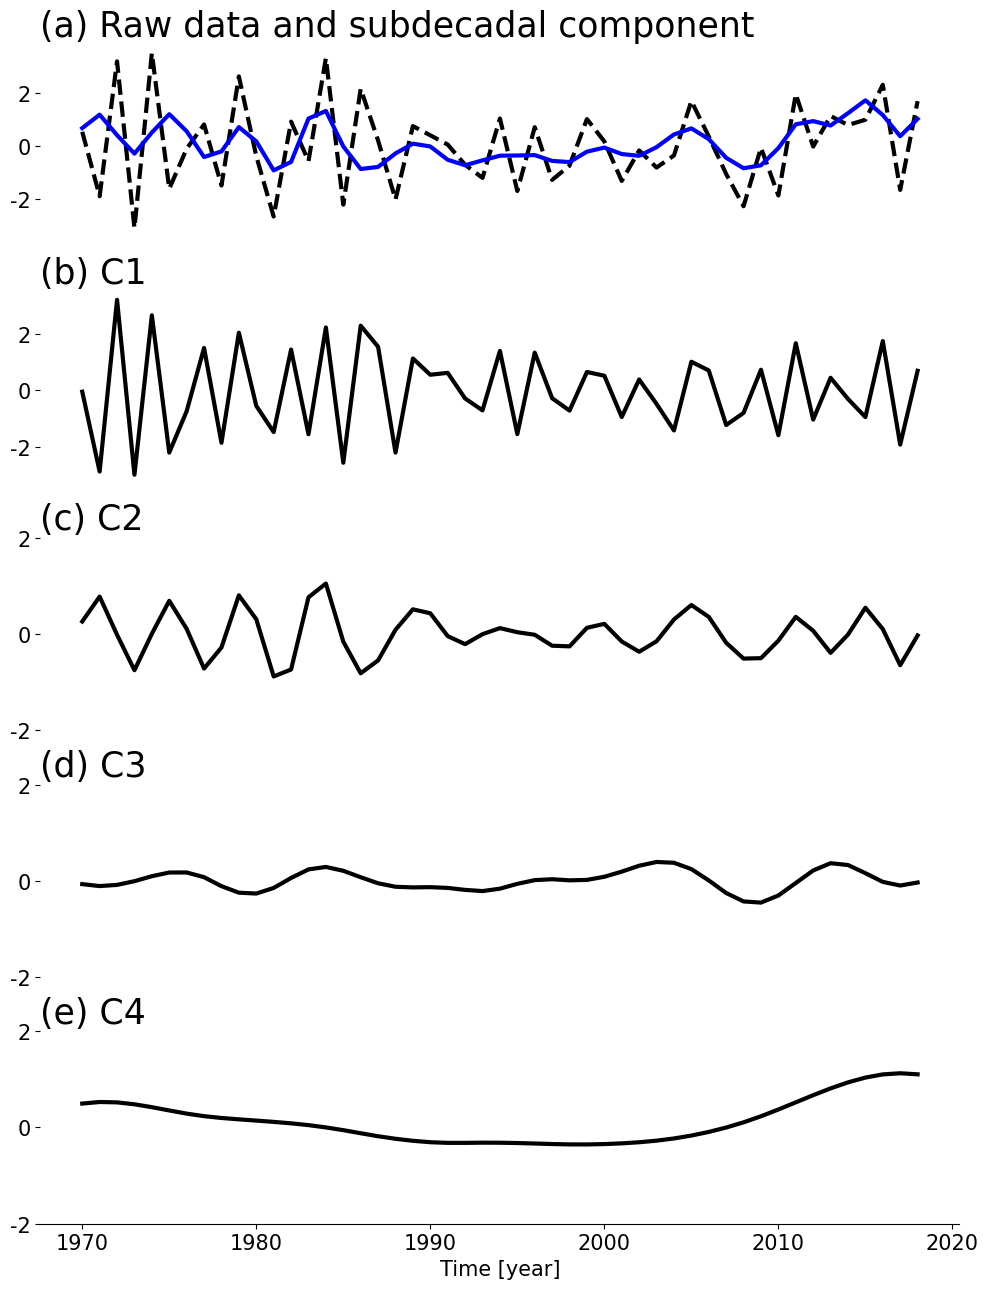

In [9]:
import matplotlib.pyplot as plt
t = np.arange(1970,2019,1)
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(10, 13),sharex=True)
plt.subplots_adjust(hspace=10,wspace =0.15)
y = [-2, 0, 2]
# y_tick_labels = np.arange(1,10,1)

fontsize = 25
#plot time signal:

axs[0].plot(t, assi[0,:], '--', color='black', linewidth=3, markersize=10, label = '')
axs[0].plot(t, assi[2,:]+assi[3,:]+assi[4,:], '-', color='blue', linewidth=3, markersize=10, label = '')
axs[0].set_title("(a) Raw data and subdecadal component  ", loc='left', fontsize=fontsize)
# axs[0].set_ylim(-0.05, 0.05)
# axs[0].set_xlabel("Time [year]", fontsize='15')
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['left'].set_visible(False)
axs[0].spines['bottom'].set_visible(False)
axs[0].tick_params(bottom = False)

axs[0].set_yticklabels(y)
axs[0].set_yticks(y)


axs[1].plot(t, assi[1,:], '-', color='black', linewidth=3, markersize=10, label = 'raw')
# axs[1].plot(t, hind[1,:], '--', color='black', linewidth=2, markersize=10)
axs[1].set_title("(b) C1 ", loc='left', fontsize=fontsize)
# axs[1].set_ylim(-10, 10)   
axs[1].spines['left'].set_visible(False)
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['bottom'].set_visible(False)
axs[1].set_yticklabels(y)
axs[1].set_yticks(y)
axs[1].tick_params(bottom = False)

# axs[0].set_yticklabels(y_tick_labels, fontsize = 30)

axs[2].plot(t, assi[2,:], '-', color='black', linewidth=3, markersize=10, label = 'raw')
# axs[2].plot(t, hind[2,:], '--', color='blue', linewidth=2, markersize=10)
axs[2].set_title("(c) C2 ", loc='left', fontsize=fontsize)
axs[2].spines['left'].set_visible(False)
axs[2].spines['top'].set_visible(False)
axs[2].spines['right'].set_visible(False)
axs[2].spines['bottom'].set_visible(False)
# axs[2].set_ylim(-0.3, 0.3)   
axs[2].set_yticklabels(y)
axs[2].set_yticks(y)
axs[2].tick_params(bottom = False)

axs[3].plot(t, assi[3,:], '-', color='black', linewidth=3, markersize=10, label = 'raw')
# axs[3].plot(t, hind[3,:], '--', color='black', linewidth=2, markersize=10, label = 'raw')
axs[3].set_title("(d) C3 ", loc='left', fontsize=fontsize)
axs[3].spines['left'].set_visible(False)
axs[3].spines['top'].set_visible(False)
axs[3].spines['right'].set_visible(False)
axs[3].spines['bottom'].set_visible(False)
# axs[3].set_ylim(-0.3, 0.3)   
axs[3].set_yticklabels(y)
axs[3].set_yticks(y)
axs[3].tick_params(bottom = False)



axs[4].plot(t, assi[4,:], '-', color='black', linewidth=3, markersize=10, label = 'raw')
# axs[4].plot(t, hind[4,:], '--', color='black', linewidth=2, markersize=10)
axs[4].set_title("(e) C4 ", loc='left', fontsize=fontsize)
# axs[4].set_ylim(-0.05, 0.05)
# axs[4].set_yticklabels([-15,0,15])
axs[4].set_yticklabels(y)
axs[4].set_yticks(y)

axs[4].set_xlabel("Time [year]", fontsize='15')
axs[4].spines['top'].set_visible(False)
axs[4].spines['right'].set_visible(False)
axs[4].spines['left'].set_visible(False)


axs[0].tick_params(axis='both', labelsize=15)
axs[1].tick_params(axis='both', labelsize=15)
axs[2].tick_params(axis='both', labelsize=15)
axs[3].tick_params(axis='both', labelsize=15)
axs[4].tick_params(axis='both', labelsize=15)


plt.tight_layout(h_pad=0.5, w_pad=None)

fig.savefig('/work/uo1075/u241321/results/s6_hflux.pdf',bbox_inches='tight')

plt.show()